In [ ]:
!pip install gdown

In [ ]:
import gdown
gdown.download(f'https://drive.google.com/uc?id=1nTsjWI0Qf6dOzhuzgq6m1P1QqOZljnBh', 'base.csv', quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1nTsjWI0Qf6dOzhuzgq6m1P1QqOZljnBh
To: /content/base.csv
100%|██████████| 258k/258k [00:00<00:00, 53.5MB/s]


'base.csv'

In [ ]:
import pandas as pd
df=pd.read_csv('base.csv')
df.head()

,transfer_date,transfer_season,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name,season_year,previous_season,Nation,...,PKwon,PKcon,Recov,GA,Saves,Save%,CS,CS%,PKA,PKsv
0,7/1/2025,25/26,Real Betis,Sporting CP,4.7,6.0,RUI SILVA,2025,2024,POR,...,0,1,25,18,37,72.2,4,26.7,3,0
1,7/1/2025,25/26,Lens,Tottenham,25.0,25.0,KEVIN DANSO,2025,2024,AUT,...,0,1,59,0,0,0.0,0,0.0,0,0
2,7/1/2025,25/26,River Plate,Rayo Vallecano,1.6,6.0,AUGUSTO BATALLA,2025,2024,ARG,...,0,0,49,39,93,75.2,8,25.0,6,2
3,7/1/2025,25/26,1.FSV Mainz 05,Stade Brestois,2.0,4.0,LUDOVIC AJORQUE,2025,2024,FRA,...,2,0,62,0,0,0.0,0,0.0,0,0
4,7/1/2025,25/26,Fiorentina,Fenerbahce,12.0,20.0,SOFYAN AMRABAT,2025,2024,MAR,...,0,0,7,0,0,0.0,0,0.0,0,0


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn

In [ ]:
#Información general de los datos
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos y valores nulos:\n")
print(df.info())
print("\nValores nulos por columna:\n")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Dimensiones del dataset: (1209, 54)

Tipos de datos y valores nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transfer_date        1209 non-null   object 
 1   transfer_season      1209 non-null   object 
 2   from_club_name       1209 non-null   object 
 3   to_club_name         1209 non-null   object 
 4   transfer_fee         1209 non-null   float64
 5   market_value_in_eur  1206 non-null   float64
 6   player_name          1209 non-null   object 
 7   season_year          1209 non-null   int64  
 8   previous_season      1209 non-null   int64  
 9   Nation               1209 non-null   object 
 10  Pos                  1209 non-null   object 
 11  Squad                1209 non-null   object 
 12  Comp                 1209 non-null   object 
 13  Age                  1209 non-null   int64  
 14  Born              

In [ ]:
# Reemplazar los valores nulos de la columna market_value_in_eur por 0
df['market_value_in_eur'] = df['market_value_in_eur'].fillna(0)

# Verificar que ya no queden nulos
print(df['market_value_in_eur'].isnull().sum())

0


In [ ]:
#Dentro del dataset tambien se consideran a jugadores prestados,
# eliminamos los datos de valores transferidos por prestamo considerando solo
# las observaciones cuyo valor de transferencia sea mayor al 40% de su valor de mercado
df=df.loc[df['market_value_in_eur']*0.4<df['transfer_fee'],:].reset_index(drop=True)
df.shape

(1040, 54)

In [ ]:
# Estadísticas descriptivas generales
print("\nEstadísticas descriptivas generales:\n")
display(df.describe().T)


Estadísticas descriptivas generales:



,count,mean,std,min,25%,50%,75%,max
transfer_fee,1040.0,14.458625,16.858613,0.1,3.7875,8.5,18.000,117.5
market_value_in_eur,1040.0,13.884087,15.509354,0.0,4.0000,8.0,18.000,120.0
season_year,1040.0,2022.717308,1.077769,2021.0,2022.0000,2023.0,2024.000,2025.0
previous_season,1040.0,2021.717308,1.077769,2020.0,2021.0000,2022.0,2023.000,2024.0
Age,1040.0,23.866346,3.677105,15.0,21.0000,23.0,26.000,36.0
Born,1040.0,1997.500000,3.843673,1986.0,1995.0000,1998.0,2000.000,2006.0
MP,1040.0,23.310577,10.727381,1.0,15.0000,26.0,32.000,38.0
Starts,1040.0,17.770192,11.342429,0.0,7.0000,18.0,28.000,38.0
Min,1040.0,1592.113462,967.079231,1.0,775.2500,1629.0,2426.500,3420.0
90s,1040.0,17.691346,10.744973,0.0,8.6000,18.1,26.925,38.0


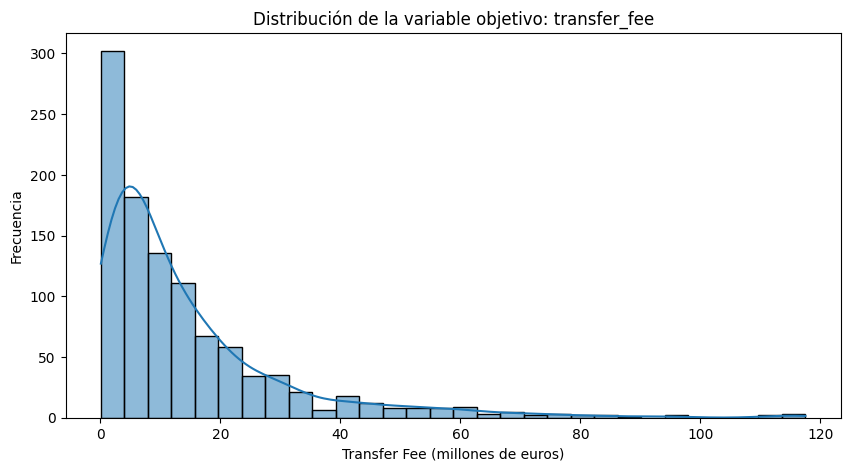

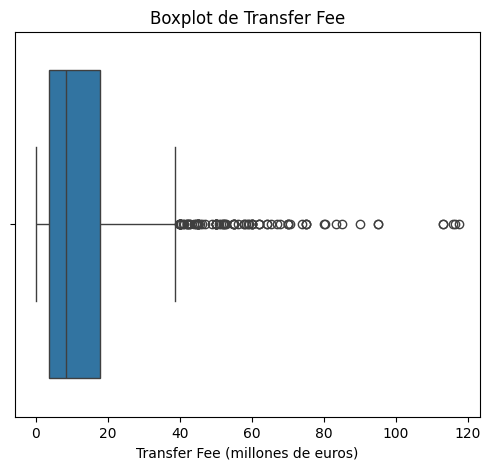

In [ ]:
# Análisis de la variable objetivo (transfer_fee)
plt.figure(figsize=(10,5))
sns.histplot(df['transfer_fee'], kde=True, bins=30)
plt.title('Distribución de la variable objetivo: transfer_fee')
plt.xlabel('Transfer Fee (millones de euros)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x=df['transfer_fee'])
plt.title('Boxplot de Transfer Fee')
plt.xlabel('Transfer Fee (millones de euros)')
plt.show()

In [ ]:
# Mantenemos solo las posiciones principales de cada jugador
df['Pos']=df['Pos'].str.split(',').str[0]
df['Pos'].value_counts()

,count
Pos,
DF,348
MF,326
FW,312
GK,54



Correlación con transfer_fee:

transfer_fee           1.000000
market_value_in_eur    0.895408
G+A                    0.389035
xAG                    0.369665
xG                     0.352912
npxG                   0.352838
Gls                    0.351707
G-PK                   0.349188
PrgC                   0.340711
KP                     0.330178
Name: transfer_fee, dtype: float64


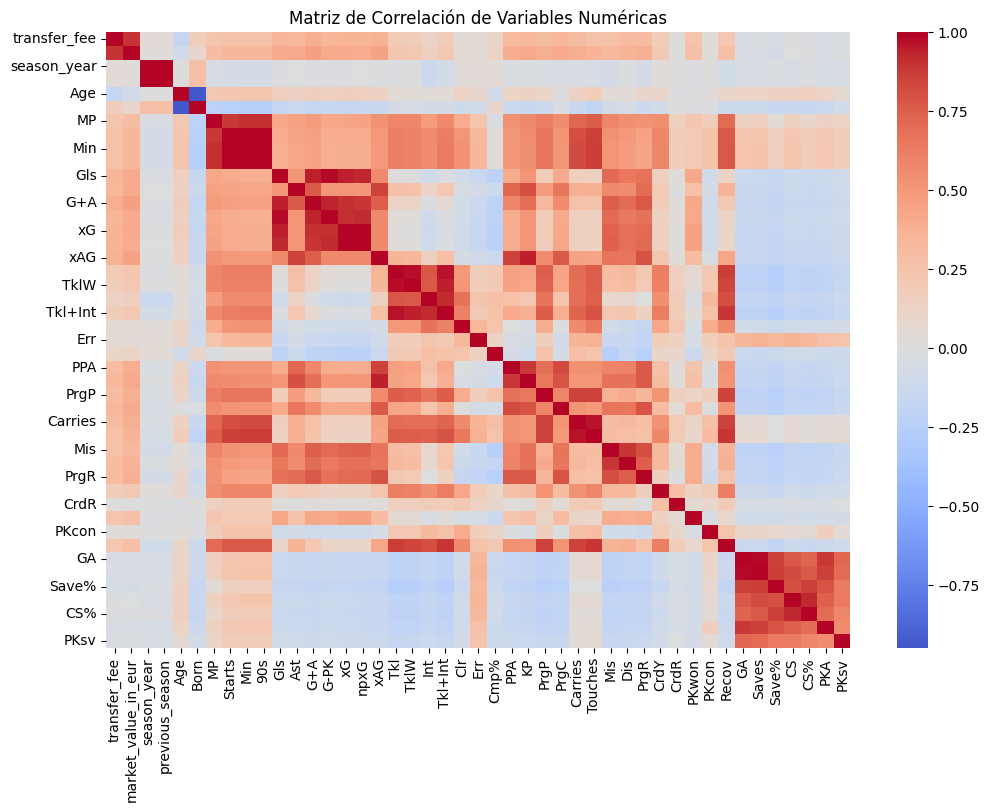

In [ ]:
# Correlaciones con variables numéricas

# Filtrar solo columnas numéricas
num_cols = df.select_dtypes(include=[np.number])

# Matriz de correlación
corr_matrix = num_cols.corr()

# Correlación con la variable objetivo
corr_target = corr_matrix['transfer_fee'].sort_values(ascending=False)
print("\nCorrelación con transfer_fee:\n")
print(corr_target.head(10))

# Mapa de calor de correlaciones
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

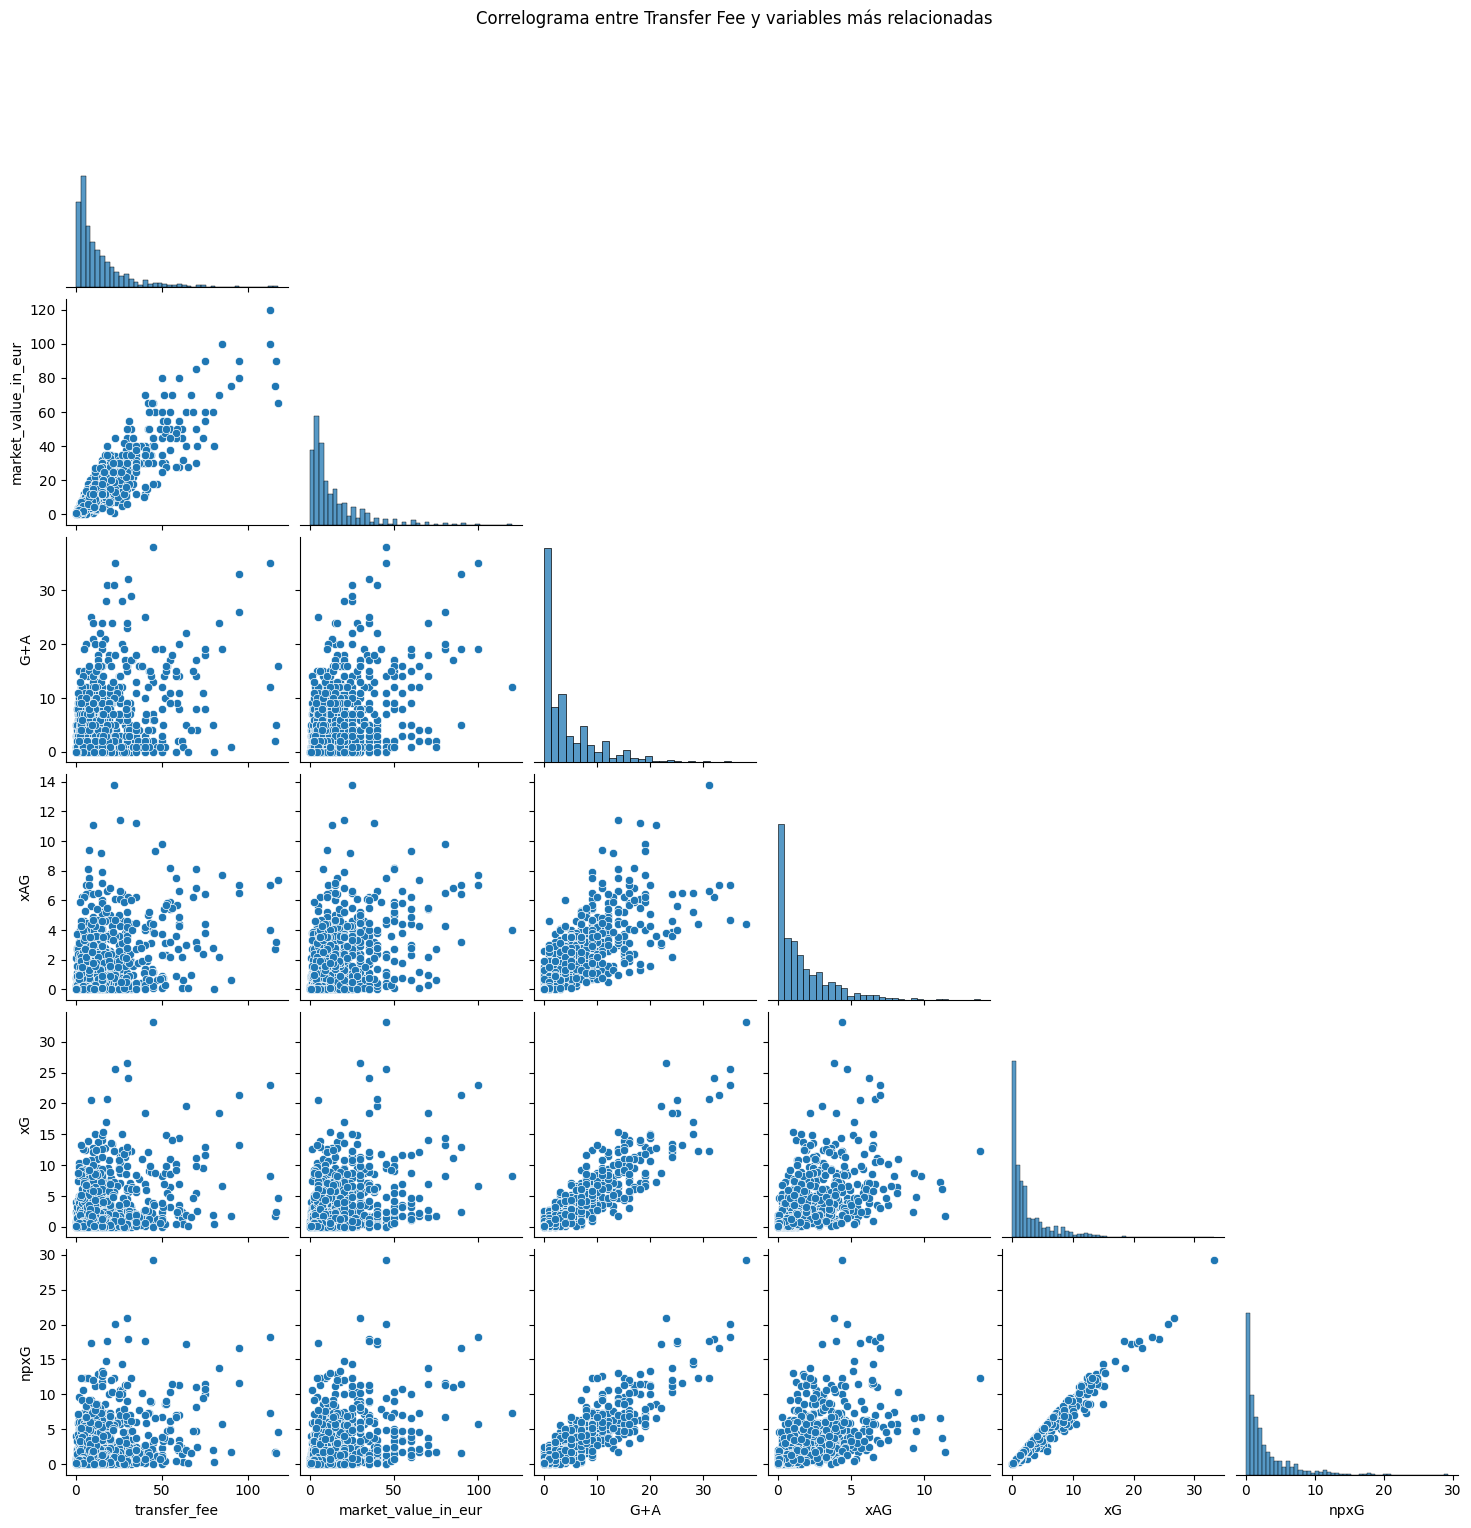

In [ ]:
# Correlograma (Pairplot)
top_corr_features = corr_target[1:6].index  # selecciona las 5 más correlacionadas
sns.pairplot(df, vars=['transfer_fee'] + list(top_corr_features), corner=True)
plt.suptitle("Correlograma entre Transfer Fee y variables más relacionadas", y=1.02)
plt.show()


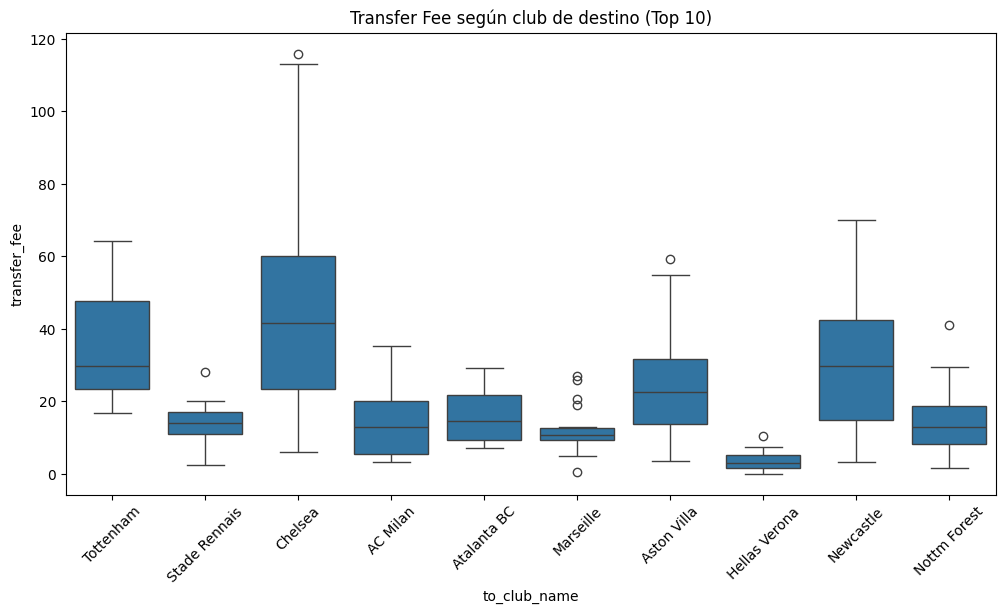

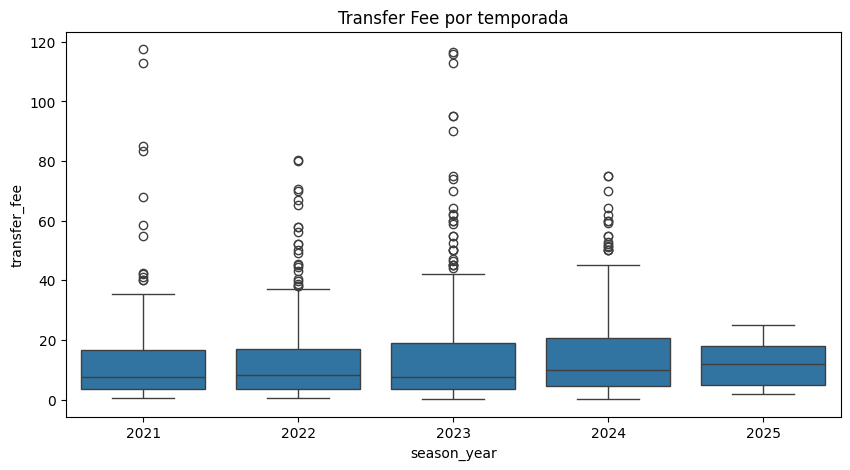

In [ ]:
# Relaciones con variables categóricas
plt.figure(figsize=(12,6))
top_clubs = df['to_club_name'].value_counts().head(10).index
sns.boxplot(data=df[df['to_club_name'].isin(top_clubs)], x='to_club_name', y='transfer_fee')
plt.title('Transfer Fee según club de destino (Top 10)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='season_year', y='transfer_fee')
plt.title('Transfer Fee por temporada')
plt.show()

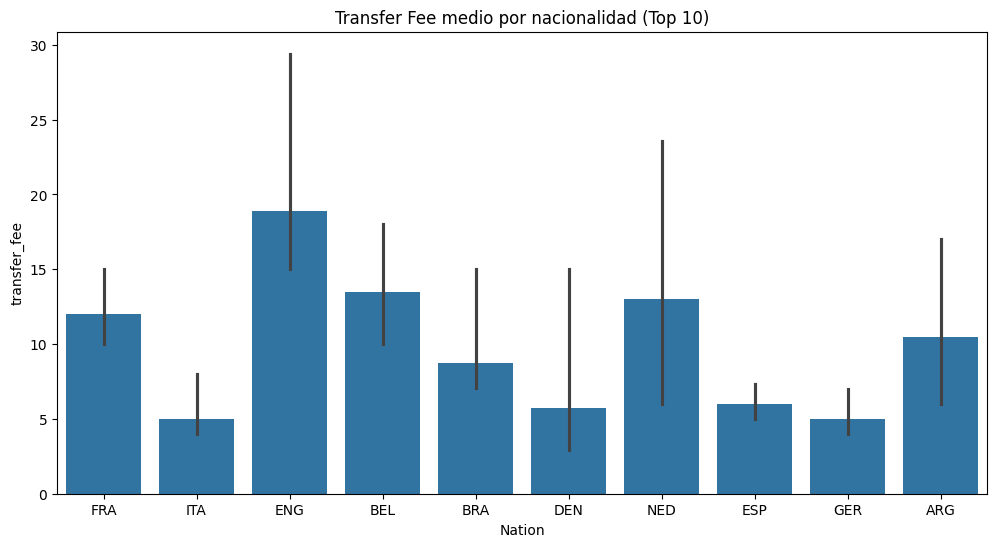

In [ ]:
# Distribución por nacionalidad
plt.figure(figsize=(12,6))
top_nations = df['Nation'].value_counts().head(10).index
sns.barplot(data=df[df['Nation'].isin(top_nations)], x='Nation', y='transfer_fee', estimator='median')
plt.title('Transfer Fee medio por nacionalidad (Top 10)')
plt.show()

In [ ]:
#Visualizacion de las columnas
df.columns

#Transformacion de variables de objeto a categoria para realizar la conversion
df['transfer_season'] = df['transfer_season'].astype('category')
df['from_club_name'] = df['from_club_name'].astype('category')
df['to_club_name'] = df['to_club_name'].astype('category')
df['player_name'] = df['player_name'].astype('category')
df['transfer_date'] = df['transfer_date'].astype('category')
df['Nation'] = df['Nation'].astype('category')
df['Pos'] = df['Pos'].astype('category')
df['Squad'] = df['Squad'].astype('category')
df['Comp'] = df['Comp'].astype('category')

# Revision de los cambios
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   transfer_date        1040 non-null   category
 1   transfer_season      1040 non-null   category
 2   from_club_name       1040 non-null   category
 3   to_club_name         1040 non-null   category
 4   transfer_fee         1040 non-null   float64 
 5   market_value_in_eur  1040 non-null   float64 
 6   player_name          1040 non-null   category
 7   season_year          1040 non-null   int64   
 8   previous_season      1040 non-null   int64   
 9   Nation               1040 non-null   category
 10  Pos                  1040 non-null   category
 11  Squad                1040 non-null   category
 12  Comp                 1040 non-null   category
 13  Age                  1040 non-null   int64   
 14  Born                 1040 non-null   int64   
 15  MP                   

In [ ]:
#Division de la muestra en la variable dependiente Y y las variables independientes X
y = df['transfer_fee']
exclude_cols = ['transfer_fee', 'transfer_date','player_name','from_club_name','Born','to_club_name','previous_season','transfer_season']
X = df.drop(columns=exclude_cols)
X.head()

,market_value_in_eur,season_year,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,...,PKwon,PKcon,Recov,GA,Saves,Save%,CS,CS%,PKA,PKsv
0,6.0,2025,POR,GK,Betis,es La Liga,30,15,15,1350,...,0,1,25,18,37,72.2,4,26.7,3,0
1,25.0,2025,AUT,DF,Lens,fr Ligue 1,25,12,12,1080,...,0,1,59,0,0,0.0,0,0.0,0,0
2,4.0,2025,FRA,FW,Brest,fr Ligue 1,30,31,29,2495,...,2,0,62,0,0,0.0,0,0.0,0,0
3,20.0,2025,MAR,MF,Fiorentina,it Serie A,27,2,2,180,...,0,0,7,0,0,0.0,0,0.0,0,0
4,18.0,2025,ITA,GK,Juventus,it Serie A,27,33,33,2970,...,0,0,36,32,71,73.8,14,42.4,5,0


In [ ]:
#Conversion de las variables categoricas en dummies
X_dummies = pd.get_dummies(X[['Pos',
                              'Comp',
                              'season_year'
                              ]], drop_first=True)
X_dummies

,season_year,Pos_FW,Pos_GK,Pos_MF,Comp_eng Premier League,Comp_es La Liga,Comp_fr Ligue 1,Comp_it Serie A
0,2025,False,True,False,False,True,False,False
1,2025,False,False,False,False,False,True,False
2,2025,True,False,False,False,False,True,False
3,2025,False,False,True,False,False,False,True
4,2025,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...
1035,2021,False,False,False,False,False,False,True
1036,2021,False,False,True,False,False,True,False
1037,2021,False,False,False,False,False,True,False
1038,2021,True,False,False,False,False,False,True


In [ ]:
X.columns

Index(['market_value_in_eur', 'season_year', 'Nation', 'Pos', 'Squad', 'Comp',
       'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'xG',
       'npxG', 'xAG', 'Tkl', 'TklW', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Cmp%',
       'PPA', 'KP', 'PrgP', 'PrgC', 'Carries', 'Touches', 'Mis', 'Dis', 'PrgR',
       'CrdY', 'CrdR', 'PKwon', 'PKcon', 'Recov', 'GA', 'Saves', 'Save%', 'CS',
       'CS%', 'PKA', 'PKsv'],
      dtype='object')

In [ ]:
X.shape

(1040, 46)

In [ ]:
from sklearn.preprocessing import TargetEncoder

X_target=X[['Nation','Squad']]
encoder=TargetEncoder()
X_target_encoded=encoder.fit_transform(X_target,y)
X_target_encoded=pd.DataFrame(X_target_encoded,columns=X_target.columns)
X_target_encoded.head()

,Nation,Squad
0,15.327995,13.242044
1,9.689482,14.977279
2,18.368068,7.391129
3,8.030239,18.734019
4,9.404950,27.192949


In [ ]:
# Concatenacion de los  (excluding the original 'team' column)
X = pd.concat([X.drop(columns=['Nation','Pos','Comp',
                              'Squad',
                              'season_year']), X_dummies,X_target_encoded], axis=1)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   market_value_in_eur      1040 non-null   float64
 1   Age                      1040 non-null   int64  
 2   MP                       1040 non-null   int64  
 3   Starts                   1040 non-null   int64  
 4   Min                      1040 non-null   int64  
 5   90s                      1040 non-null   float64
 6   Gls                      1040 non-null   int64  
 7   Ast                      1040 non-null   int64  
 8   G+A                      1040 non-null   int64  
 9   G-PK                     1040 non-null   int64  
 10  xG                       1040 non-null   float64
 11  npxG                     1040 non-null   float64
 12  xAG                      1040 non-null   float64
 13  Tkl                      1040 non-null   int64  
 14  TklW                    

In [ ]:
from sklearn.model_selection import train_test_split
# Particion de la muestra en train y test relacion (80,20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_train, y_train, random_state=42)


mi_df = pd.Series(mi, index=X_train.columns, name='mutual_info').sort_values(ascending=False)


threshold = 0.01
selected_features = mi_df[mi_df > threshold].index

X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

print(f"Selected {len(selected_features)} features out of {X_train.shape[1]}")

Selected 36 features out of 51


In [ ]:
selected_features

Index(['market_value_in_eur', 'Squad', 'KP', 'Carries', 'G+A', 'Touches',
       'Comp_eng Premier League', 'Age', 'npxG', 'MP', 'Ast', 'xG', 'Starts',
       'PrgC', 'Dis', 'Min', 'G-PK', '90s', 'Gls', 'Tkl+Int', 'xAG', 'TklW',
       'PrgP', 'Recov', 'PKwon', 'Cmp%', 'Int', 'Nation', 'CrdR', 'PPA',
       'Comp_fr Ligue 1', 'CS%', 'Pos_GK', 'GA', 'Comp_it Serie A', 'PrgR'],
      dtype='object')

#### Regresion Lineal

In [ ]:
# Importacion de Librerias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error


In [ ]:
# Modelo de Regresion Lineal
model = LinearRegression()
model.fit(X_train_filtered, y_train)

LinearRegression()

In [ ]:
# Obtenemos todos los parámetros
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# Prediccion de la muestra Test
y_pred_linar_regression = model.predict(X_test_filtered)

In [ ]:
# Parametros de interpretación
# R² Score
r2 = r2_score(y_test, y_pred_linar_regression)
print(f"R² Score: {r2:.4f}")

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_linar_regression)
print(f"MAPE: {mape:.4f}")

R² Score: 0.8321
MAPE: 0.6773


#### Arboles de regresion

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=300,  # number of trees
    max_depth=10,
    random_state=42
)
forest.fit(X_train_filtered, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [ ]:
forest_pred=forest.predict(X_test_filtered)
r2 = r2_score(y_test, forest_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.7886


In [ ]:
importances = forest.feature_importances_

# Put them in a nice table
feature_importance_df = pd.DataFrame({
    'feature': X_train_filtered.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feature_importance_df.head(10))

                feature  importance
0   market_value_in_eur    0.808723
7                   Age    0.026356
22                 PrgP    0.018983
27               Nation    0.016299
1                 Squad    0.010618
10                  Ast    0.009326
25                 Cmp%    0.007246
23                Recov    0.006570
13                 PrgC    0.006090
14                  Dis    0.005785


In [ ]:
print(feature_importance_df.tail(10))

            feature  importance
12           Starts    0.002494
18              Gls    0.002257
28             CrdR    0.002130
16             G-PK    0.001773
24            PKwon    0.001726
30  Comp_fr Ligue 1    0.000880
34  Comp_it Serie A    0.000648
31              CS%    0.000212
33               GA    0.000197
32           Pos_GK    0.000081


#### Modelo XGBOOST

In [ ]:
# Importacion de Librerias
import xgboost as xgb

In [ ]:
# Modelo XGBOOST
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=10000, learning_rate=0.2,
                            n_jobs=-1)
xgb_reg.fit(X_train_filtered, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# Prediccion del Modelo
y_pred_xbgoost = xgb_reg.predict(X_test_filtered)

In [ ]:
# Parametros de interpretación
# R² Score
r2 = r2_score(y_test, y_pred_xbgoost)
print(f"R² Score: {r2:.4f}")

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_xbgoost)
print(f"MAPE: {mape:.4f}")

R² Score: 0.7431
MAPE: 0.7168


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

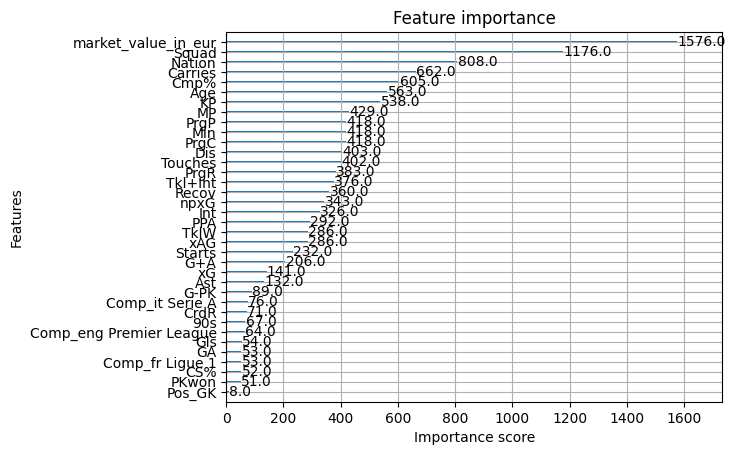

In [ ]:
# Grafica de variables mas importantes
xgb.plot_importance(xgb_reg)

#### Modelo Support Vector Machiene (SVM)

In [ ]:
# Importacion de Librerias
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
# Escalar
sc = StandardScaler().fit(X_train_filtered)

# Transformacion de datos de train y test con escalar
X_train_std = sc.transform(X_train_filtered)
X_test_std = sc.transform(X_test_filtered)

In [ ]:
# Modelo
svr = SVR(kernel='linear', C = 500)
svr.fit(X_train_std, y_train)

SVR(C=500, kernel='linear')

In [ ]:
# Estimacion de la prediccion
y_test_pred_svm = svr.predict(X_test_std)
y_train_pred_svm = svr.predict(X_train_std)


In [ ]:
# Parametros de interpretación
# R² Score
r2 = r2_score(y_test, y_test_pred_svm)
print(f"R² Score: {r2:.4f}")

# MAPE
mape = mean_absolute_percentage_error(y_test, y_test_pred_svm)
print(f"MAPE: {mape:.4f}")

R² Score: 0.8376
MAPE: 0.5084


## Prediccion

In [ ]:
gdown.download(f'https://drive.google.com/uc?id=1OdPJrmF203yHSo6MbL0UQkBaoH3sR5fR', 'base_completa.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OdPJrmF203yHSo6MbL0UQkBaoH3sR5fR
To: /content/base_completa.csv
100%|██████████| 3.22M/3.22M [00:00<00:00, 19.1MB/s]


'base_completa.csv'

In [ ]:
base_completa=pd.read_csv('base_completa.csv')
base_completa.head()

,player_name,market_value_in_eur,image_url,season_year,previous_season,Nation,Pos,Squad,Comp,Age,...,PKcon,Recov,GA,Saves,Save%,CS,CS%,PKA,PKsv,Season
0,KACPER URBANSKI,0.20,https://img.a.transfermarkt.technology/portrai...,2021,2020,POL,FW,Bologna,it Serie A,15,...,0,0,0,0,0.0,0,0.0,0,0,2020
1,MARVIN TSHIBUABUA,0.35,https://img.a.transfermarkt.technology/portrai...,2021,2020,FRA,DF,Saint-Etienne,fr Ligue 1,18,...,0,5,0,0,0.0,0,0.0,0,0,2020
2,BAPTISTE GABARD,0.25,https://img.a.transfermarkt.technology/portrai...,2021,2020,FRA,MF,Saint-Etienne,fr Ligue 1,20,...,0,3,0,0,0.0,0,0.0,0,0,2020
3,ALEXANDRE JANKEWITZ,0.50,https://img.a.transfermarkt.technology/portrai...,2021,2020,SUI,MF,Southampton,eng Premier League,18,...,0,0,0,0,0.0,0,0.0,0,0,2020
4,ELLIOT ANDERSON,0.20,https://img.a.transfermarkt.technology/portrai...,2021,2020,ENG,MF,Newcastle Utd,eng Premier League,17,...,0,0,0,0,0.0,0,0.0,0,0,2020


In [ ]:
base_completa['market_value_in_eur'] = base_completa['market_value_in_eur'].fillna(0)
base_completa['Pos']=base_completa['Pos'].str.split(',').str[0]



In [ ]:
exclude_cols = ['Born','previous_season']
X_pred = base_completa.drop(columns=exclude_cols)

In [ ]:
X_pred_dummies = pd.get_dummies(X_pred[['Pos',
                              'Comp',
                              'season_year'
                              ]], drop_first=True)
X_pred_target_encoded=encoder.transform(X_pred[['Nation','Squad']])
X_pred_target_encoded=pd.DataFrame(X_pred_target_encoded,columns=X_target.columns)

X_pred = pd.concat([X_pred.drop(columns=['Nation','Pos','Comp',
                              'Squad',
                              'season_year']), X_pred_dummies,X_pred_target_encoded], axis=1)


In [ ]:
X_pred_filtered = X_pred[selected_features]

### SVM

In [ ]:
X_pred_dummies.shape

(12451, 8)

In [ ]:
X_pred_std = sc.transform(X_pred_filtered)
y_pred_svm = svr.predict(X_pred_std)

In [ ]:
base_completa['prediccion']=y_pred_svm

In [ ]:
base_completa.head()

,player_name,market_value_in_eur,image_url,season_year,previous_season,Nation,Pos,Squad,Comp,Age,...,Recov,GA,Saves,Save%,CS,CS%,PKA,PKsv,Season,prediccion
0,KACPER URBANSKI,0.20,https://img.a.transfermarkt.technology/portrai...,2021,2020,POL,FW,Bologna,it Serie A,15,...,0,0,0,0.0,0,0.0,0,0,2020,2.262386
1,MARVIN TSHIBUABUA,0.35,https://img.a.transfermarkt.technology/portrai...,2021,2020,FRA,DF,Saint-Etienne,fr Ligue 1,18,...,5,0,0,0.0,0,0.0,0,0,2020,1.897908
2,BAPTISTE GABARD,0.25,https://img.a.transfermarkt.technology/portrai...,2021,2020,FRA,MF,Saint-Etienne,fr Ligue 1,20,...,3,0,0,0.0,0,0.0,0,0,2020,1.275099
3,ALEXANDRE JANKEWITZ,0.50,https://img.a.transfermarkt.technology/portrai...,2021,2020,SUI,MF,Southampton,eng Premier League,18,...,0,0,0,0.0,0,0.0,0,0,2020,4.550175
4,ELLIOT ANDERSON,0.20,https://img.a.transfermarkt.technology/portrai...,2021,2020,ENG,MF,Newcastle Utd,eng Premier League,17,...,0,0,0,0.0,0,0.0,0,0,2020,5.464738


In [ ]:
base_completa=base_completa.drop_duplicates()

In [ ]:
base_completa.sort_values(by='prediccion',ascending=False).head(10)

,player_name,market_value_in_eur,image_url,season_year,previous_season,Nation,Pos,Squad,Comp,Age,...,Recov,GA,Saves,Save%,CS,CS%,PKA,PKsv,Season,prediccion
8858,ERLING HAALAND,200.0,https://img.a.transfermarkt.technology/portrai...,2024,2023,NOR,FW,Manchester City,eng Premier League,23,...,47,0,0,0.0,0,0.0,0,0,2023,190.434339
11444,ERLING HAALAND,200.0,https://img.a.transfermarkt.technology/portrai...,2025,2024,NOR,FW,Manchester City,eng Premier League,24,...,34,0,0,0.0,0,0.0,0,0,2024,189.790590
12326,VINICIUS JUNIOR,200.0,https://img.a.transfermarkt.technology/portrai...,2025,2024,BRA,FW,Real Madrid,es La Liga,24,...,71,0,0,0.0,0,0.0,0,0,2024,185.650234
9956,VINICIUS JUNIOR,200.0,https://img.a.transfermarkt.technology/portrai...,2024,2023,BRA,FW,Real Madrid,es La Liga,23,...,44,0,0,0.0,0,0.0,0,0,2023,185.083502
6563,ERLING HAALAND,180.0,https://img.a.transfermarkt.technology/portrai...,2023,2022,NOR,FW,Manchester City,eng Premier League,22,...,37,0,0,0.0,0,0.0,0,0,2022,171.176075
6115,KYLIAN MBAPPE,180.0,https://img.a.transfermarkt.technology/portrai...,2023,2022,FRA,FW,Paris S-G,fr Ligue 1,23,...,54,0,0,0.0,0,0.0,0,0,2022,168.657302
12385,JUDE BELLINGHAM,180.0,https://img.a.transfermarkt.technology/portrai...,2025,2024,ENG,MF,Real Madrid,es La Liga,21,...,97,0,0,0.0,0,0.0,0,0,2024,168.139596
7543,JUDE BELLINGHAM,180.0,https://img.a.transfermarkt.technology/portrai...,2023,2022,ENG,MF,Dortmund,de Bundesliga,19,...,198,0,0,0.0,0,0.0,0,0,2022,168.048050
4962,KYLIAN MBAPPE,180.0,https://img.a.transfermarkt.technology/portrai...,2022,2021,FRA,FW,Paris S-G,fr Ligue 1,22,...,63,0,0,0.0,0,0.0,0,0,2021,167.997432
10029,JUDE BELLINGHAM,180.0,https://img.a.transfermarkt.technology/portrai...,2024,2023,ENG,MF,Real Madrid,es La Liga,20,...,118,0,0,0.0,0,0.0,0,0,2023,167.886945


In [ ]:
base_completa.to_json('predicciones.json',orient='records')

In [ ]:
base_completa['season_year'].unique()

array([2021, 2022, 2023, 2024, 2025])